inputs can be referred to as:
* predictors
* independent variables
* variables
* features

outputs can be referred to as:
* response variables
* dependent variables

problems with Quantitative response are called: (like weigth, heigth, ...)
* regressions problems

probelsm with Qualitative response are called: (yes/no, blue or green, ...)
* classification problems

# Classification
# k Nearest Neighbors 

## determine the Euclidean distance between two points expressed as NumPy arrays
### kNN classifier classifies observations according to the most common class among the k nearest neighbor

In [65]:
import numpy as np

def distance(p1, p2):
    """Find the distance between points p1 and p2."""
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1, p2)

4.242640687119285

## find the majority vote

In [66]:
import random

def majority_vote(votes):
    """Return the most common element in votes."""
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    winners = []
    max_count = max(vote_counts.values())
    # loop over the dictionary
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
                        
    return random.choice(winners)

votes = [1,2,3,2,3,3,3,2,3,3,1,1,2,2,2]
winner = majority_vote(votes) # randomly winner is 2 or 3 bc of the tie between 2 and 3
print(winner)




2


# scipy
## find the majority vote using scipy

In [69]:
import random
import scipy.stats as ss

def majority_vote_short(votes):
    """Return the most common element in votes."""
    mode, count = ss.mstats.mode(votes)                    
    return mode

votes = [1,2,3,2,3,3,3,2,3,3,1,1,2,2,2]
winner = majority_votes(votes) # randomly winner is 2 or 3 bc of the tie between 2 and 3
print(winner)


2


## find nearest neighbors of an observation
use the nearest neighbors to predict the class of an observation

k closest points to point p:  [[2 2]
 [3 2]]
k closest points to point p:  [[2 2]
 [3 2]
 [2 1]]


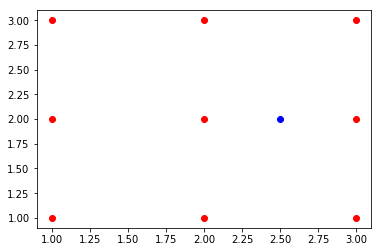

In [93]:
# loop over all points
    # compute the distance between point p and every other point
# sort distances and return those k points that are nearest to point p

def find_nearest_neighbor(p, points, k=5):
    """Find the k nearest neighbors of point p and return their indices."""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[0:k]


points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5, 2])

# just for visualizing
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0], p[1], "bo")

ind = find_nearest_neighbor(p, points, 2)
print("k closest points to point p: ", points[ind])

ind = find_nearest_neighbor(p, points, 3)
print("k closest points to point p: ", points[ind])




# predict the class of our point p

In [103]:
# find k nearest neighbors
# predict the class of p based on majority vote

def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbor(p, points, k)
    return majority_vote(outcomes[ind])

# we have 9 points so we need 9 outcomes 
# let's assume we have 2 classes 0 and 1
outcomes = np.array([0,0,0,0,1,1,1,1,1])
    
knn_predict(np.array([2.7, 2.5]), points, outcomes, k=2)
# output is 1 meaning:
# we expect the point p located at [2.7, 2.5] would be belong to class 1


knn_predict(np.array([1.0, 1.5]), points, outcomes, k=2)
# output is 0 meaning:
# we expect the point p located at [1.0, 1.5] would be belong to class 0

   

0

# generate synthetic data

In [104]:
# norm(mean,sd)
ss.norm(0, 1).rvs((5,2))


array([[-0.38942146, -0.71214186],
       [ 1.9185854 ,  0.50843683],
       [ 1.34713321,  0.02932434],
       [-0.34486489,  0.06194481],
       [ 1.49869903, -0.70620099]])

In [105]:
ss.norm(1,1).rvs((5,2))

array([[ 1.43673348,  0.34261956],
       [ 1.66331736,  1.65031415],
       [ 1.05582034,  1.50733558],
       [-1.18609291,  2.64244949],
       [ 2.53863056,  0.12467794]])

In [109]:
np.concatenate((ss.norm(0, 1).rvs((5,2)), ss.norm(1,1).rvs((5,2))), axis = 0)
# axis = 0 bc we are concatenating along the rows of this array

array([[ 0.75958653,  0.25539365],
       [ 0.78611601, -0.83750053],
       [ 0.09650812, -0.46735066],
       [ 0.31977762, -0.36621412],
       [ 0.09640691, -0.92195864],
       [ 0.2919818 ,  0.92624571],
       [-0.32581436,  0.99195912],
       [ 0.06164949,  0.6657401 ],
       [ 1.99960636,  1.05202177],
       [ 2.64078045,  1.05297773]])

## a function that generates 2-end data points
* first end points are from class 0
* second end points are from class 1


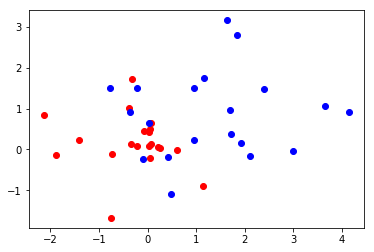

In [116]:
def generate_synth_data(n=50):
    """Create two sets of points from bivariate normal distribution."""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 20
(points, outcomes) = generate_synth_data(n)

plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")
plt.savefig("bivardata.pdf")
# 20 red points and 20 blue points corresponding to the different categories
    
 

# making a prediction grid

In [131]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """Classify each point on the prediction grid."""
    # generate the mesh grid
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    # generate the classifier prediction corresponding to every point in the mesh grid
    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    return(xx, yy, prediction_grid)
    
       

### enumerate 
it takes an iterable and returns a new iterable with tuples as elements, where the first index of each tuple is the index of the tuple in the iterable

In [132]:
seasons = ["spring", "summer", "fall", "winter"]
print(list(enumerate(seasons)))
print()
for ind, season in enumerate(seasons):
    print(ind, season)

[(0, 'spring'), (1, 'summer'), (2, 'fall'), (3, 'winter')]

0 spring
1 summer
2 fall
3 winter


# plotting the prediction grid

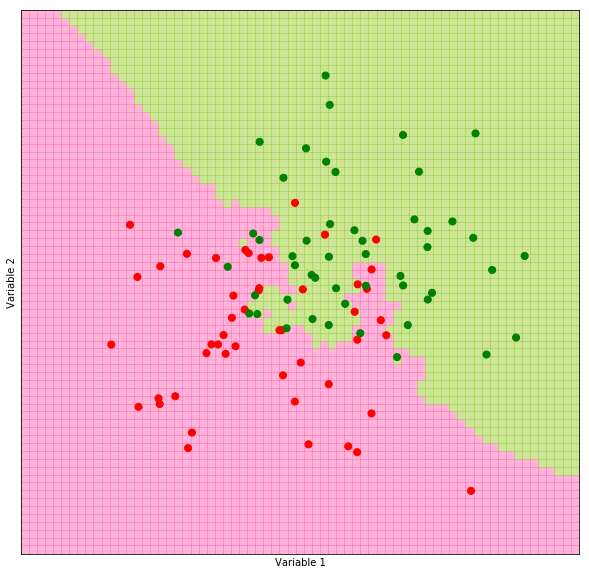

In [135]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)



(predictors, outcomes) = generate_synth_data()

k=5; filename="knn_synth_5.pdf"; limits=(-3,4,-3,4); h=0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [125]:
predictors.shape

(100, 2)

In [126]:
outcomes.shape

(100,)

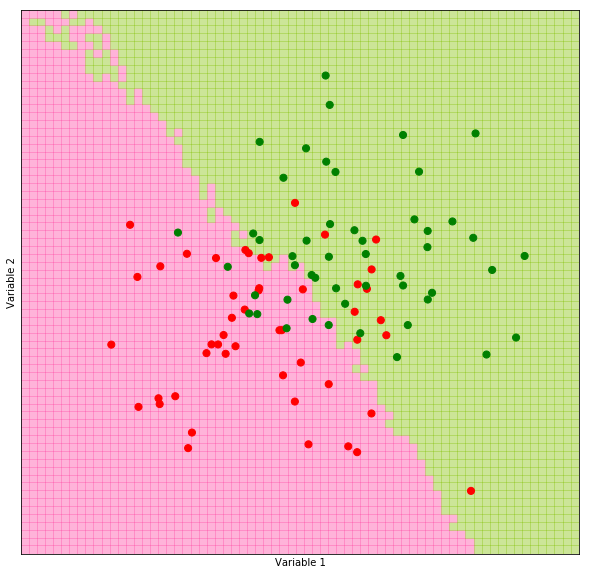

In [136]:
k=50; filename="knn_synth_50.pdf"; limits=(-3,4,-3,4); h=0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

### comparing the above two plots and you'll see that the decision boundry for k=50 is smoother than the plot for k=5

Bias-variance tradeoff: for this example k=5 is a reasonable choice

# applying the home-made kNN method and compare it with scikit-learn module

150


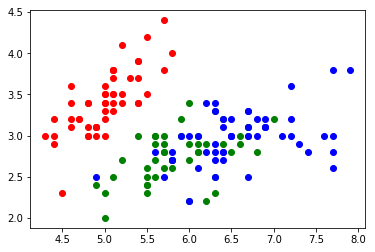

In [144]:
# the DB is a collection of 150 iris flowers 
# with 4 covariates: sepal length, sepal width, petal length, petal width

from sklearn import datasets

iris = datasets.load_iris()
print(len(iris["data"]))
predictors = iris.data[:, 0:2]
outcomes = iris.target

plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1] , "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1] , "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1] , "bo")

plt.savefig("iris.pdf")



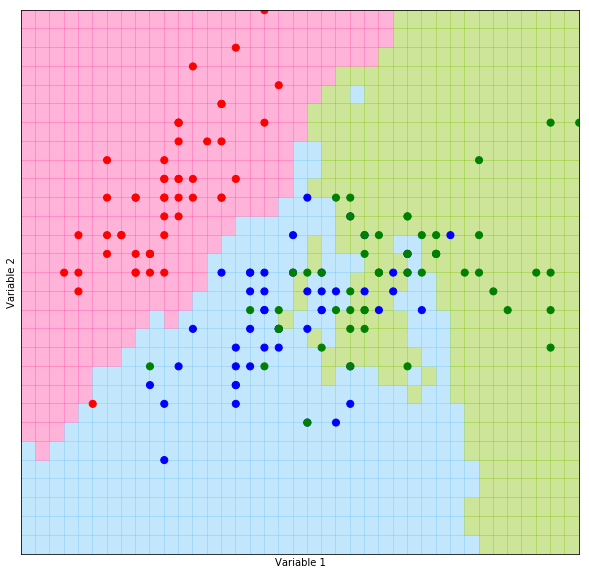

In [145]:
k=5; filename="iris_grid.pdf"; limits=(4,8,1.5,4.5); h=0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [161]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

# compare scikit predictions with my predictions
print("my predictions vs scikit predictions ", np.mean(sk_predictions == my_predictions)*100)

print("scikit predictions vs outcomes ", np.mean(sk_predictions == outcomes)*100)
print("my predictions vs outcomes ", np.mean(my_predictions == outcomes)*100)



my predictions vs scikit predictions  96.0
scikit predictions vs outcomes  83.33333333333334
my predictions vs outcomes  84.66666666666667
